## Dátová množina - Telco Customer (záverečné zadanie)

Pre účely zadania budeme pracovať s dátamo v oblasti telekomunikácií. Dataset (súbor `Telecom-Churn.csv` v adresári `data`) obsahuje informácie o zákazníkoch telekomunikačného operátora vrátane informácií o nich samotných a informáciach o službách, ktoré u daného operátora majú aktivované. 
Cieľom je vytvoriť prediktívny model, ktorý bude predpovedať (na základe informácií o zákazníkoch), či od telekomunikačného operátora odídu alebo nie (atribút `Churn`). 

Popis dát:

* customerID - identifikátor zákazníka
* gender - pohlavie zákazníka
* SeniorCitizen - udáva, či je zákazník senior, alebo nie (1, 0)
* Partner - udáva, či má zákazník partnera, alebo nie (Yes, No)
* Dependents - udáva, či má zákazník ľudí na ňom závislých alebo nie (Yes, No)
* tenure - ako dlho je už zákazník zákazníkom telekomunikačnej spoločnosti (v mesiacoch)
* PhoneService - udáva, či zákazník má telefonickú službu alebo nie (Yes, No)
* MultipleLines - či zákazník používa viacero liniek (čísel) (Yes, No, No phone service)
* InternetService - typ pripojenia zákanzíkna na internet (DSL, Fiber optic, No)
* OnlineSecurity - udáva, či používateľ používa službu zabezpečenia pripojenia (Yes, No, No internet service)
* OnlineBackup - udáva, či používateľ používa službu online zálohovania (Yes, No, No internet service)
* DeviceProtectionWhether - používanie zabezpečenia zariadenia (Yes, No, No internet service)
* TechSupport - služba technickej podpory (Yes, No, No internet service)
* StreamingTV - služba streamovanej televízie (Yes, No, No internet service)
* StreamingMovies - služba streamovania filmov (Yes, No, No internet service)
* Contract - typ kontraktu, ktorý zákazník uzavrel (Month-to-month, One year, Two year)
* PaperlessBilling - či má aktivovanú službu výpisov účtov elektronicky (Yes, No)
* PaymentMethod - spôsob platby (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges - mesačná výška platby
* TotalCharges - celková výška platby
* Churn - cieľový atribút - či používateľ odišiel od operátora alebo nie (Yes or No)


### Úloha 1 - Načítanie dát (2b)

Načítajte dáta do dátového rámca a odstráňte nepotrebné atribúty, ktoré sa nedajú využiť pri analýze dát.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# nastavíme zobrazovanie grafov priamo v odstavcoch zápisníka
%matplotlib inline
# inicializujeme knižnicu seaborn
sns.set()

In [2]:
data = pd.read_csv("../data/Telecom-Churn.csv")
data = data.drop(columns="CustomerID")
data = data.drop(columns="Unnamed: 0")
data.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.columns


Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Úloha 2 - Základné štatistiky (4b)

* Pre číselné atribúty vypočítajte základné štatistiky a vizualizujte distribúciu pravdepodobnosti výskytu hodnôt.
* Pre nominálne/ordinálne atribúty vypočítajte početnosti hodnôt. Vykreslite pre ne histogramy.
* Pre každý atribút vypočítajte počet chýbajúcich hodnôt.

In [4]:
data_numeric = data.drop(columns="SeniorCitizen")
data_numeric.describe()

,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7017.000000,7032.000000
mean,32.371149,64.707482,2283.300441
std,24.559481,30.105503,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.400000,401.450000
50%,29.000000,70.300000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


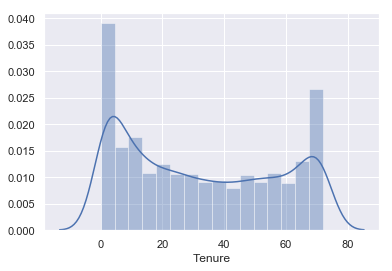

In [5]:
g = sns.distplot(data["Tenure"])

C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\User\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


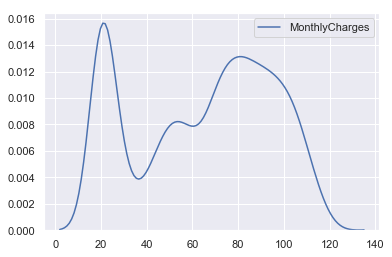

In [6]:
g = sns.kdeplot(data["MonthlyCharges"])

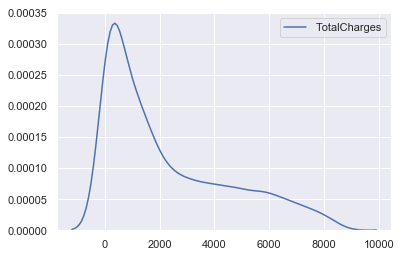

In [7]:
g = sns.kdeplot(data["TotalCharges"])

In [8]:
data["Gender"].value_counts()
#nie binarne - 1,0; yes,no
#len Gender, InternetService, Contract, PaymentMethod

Male      3555
Female    3488
Name: Gender, dtype: int64

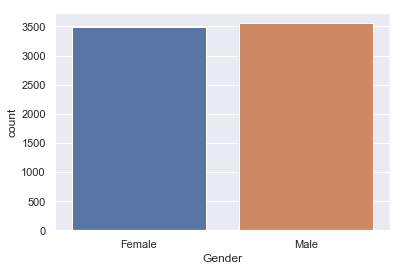

In [9]:
g = sns.countplot(x = "Gender", data = data)

In [10]:
data["InternetService"].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

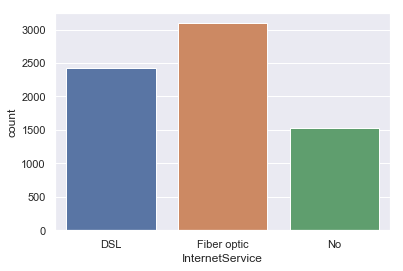

In [11]:
g = sns.countplot(x = "InternetService", data = data)

In [12]:
data["Contract"].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

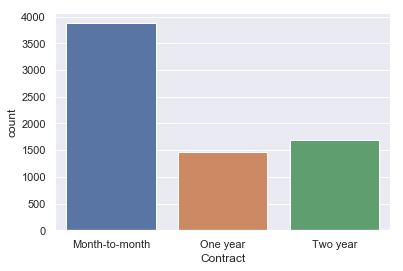

In [13]:
g = sns.countplot(x = "Contract", data = data)

In [14]:
data["PaymentMethod"].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

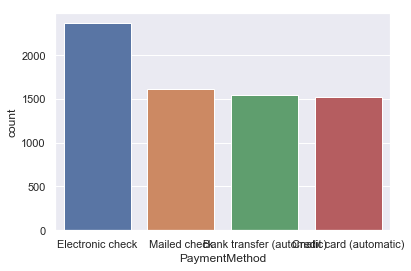

In [15]:
g = sns.countplot(x = "PaymentMethod", data = data)

In [16]:
data.isna().sum()

Gender               0
SeniorCitizen        0
Partner              0
Dependents          20
Tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      26
TotalCharges        11
Churn                0
dtype: int64

### Úloha 3 - Závislosti medzi číselnými atribútmi (3b)

Vypočítajte korelačnú maticu pre číselné atribúty a identifikujte, ktoré atribúty sú najviac korelované.

In [17]:
corr_table = data_numeric.corr()
corr_table

,Tenure,MonthlyCharges,TotalCharges
Tenure,1.000000,0.247732,0.825880
MonthlyCharges,0.247732,1.000000,0.651316
TotalCharges,0.825880,0.651316,1.000000


In [18]:
# najviac su korelovane Tenure s TotalCharges

### Úloha 4 - Diskretizácia hodnôt (4b)

* Diskretizujte číselné atribúty `MonthlyCharges` a `TotalCharges` do 5 rovnako veľkých intervalov.
* Diskretizujte číselný atribút `Tenure` na 5 intervalov s rovnakou početnosťou príkladov.

In [19]:
# max_MonthlyCharges = 120
max_MonthlyCharges = data["MonthlyCharges"].max()
data["MonthlyCharges_ordinal"] = pd.cut(data["MonthlyCharges"], bins=[0, 25, 50, 75, 100, max_MonthlyCharges], include_lowest=True, labels=["very cheap", "cheap", "normal", "expensive", "very expensive"])
# zobrazíme ordinálne hodnoty a ich početnosti
data["MonthlyCharges_ordinal"].value_counts()
# data["MonthlyCharges_ordinal"] = pd.cut(data["MonthlyCharges"], 5) 

expensive         2209
normal            1617
very cheap        1406
very expensive     896
cheap              889
Name: MonthlyCharges_ordinal, dtype: int64

In [20]:
# max_TotalCharges = 8684
max_TotalCharges = data["TotalCharges"].max()
data["TotalCharges_ordinal"] = pd.cut(data["TotalCharges"], bins=[0, 1700, 3400, 5100, 6800, max_TotalCharges], include_lowest=True, labels=["very small amount", "small amount", "normal amount", "big amount", "very big amount"])
# zobrazíme ordinálne hodnoty a ich početnosti
data["TotalCharges_ordinal"].value_counts()

very small amount    3875
small amount         1188
normal amount         880
big amount            694
very big amount       395
Name: TotalCharges_ordinal, dtype: int64

In [21]:
# max_Tenure = 72
max_Tenure = data["Tenure"].max()
data["Tenure_ordinal"] = pd.cut(data["Tenure"], bins=[0, 5, 19, 40, 60, max_Tenure], include_lowest=True, labels=["very short", "short", "mean", "long", "very long"])
# zobrazíme ordinálne hodnoty a ich početnosti
data["Tenure_ordinal"].value_counts()
# mohla som jednoduchsie : data["Tenure_ordinal"] = pd.qcut(data["Tenure"], 5)

mean          1479
short         1436
very long     1407
very short    1371
long          1350
Name: Tenure_ordinal, dtype: int64

### Úloha 5 - Závislosti medzi nominálnymi/ordinálnymi atribútmi (5b)

* Pomocou kontingenčnej tabuľky zistite, aká je závislosť medzi atribútmi `Tenure`, `MonthlyCharges`, `TotalCharges` a atribútom `Churn` (využite diskretizovanie hodnôt z úlohy 4). Závislosti vizualizujte vhodným spôsobom pomocou knižnice Seaborn.
* Pomocou kontingenčnej tabuľky zistite, aká je závislosť medzi atribútmi `Gender`, `SeniorCitizen` a atribútom `Churn`.
* Pomocou krížovej tabuľky zistite početnosť rôznych kombinácií služieb pre atribúty `PhoneService`, `InternetService`, `StreamingTV`, `StreamingMovies`. Početnosti vizualizujte aj pomocou Seaborn knižnice.

In [22]:
#pd.pivot_table(data_telecom, index=["Churn", "Tenure_ordinal"], values=["MonthlyCharges", "TotalCharges"], aggfunc=["median", "mean", "min", "max", "count"])
# g = sns.barplot(x= , y= , Hue="Churn" , data=data)
# crosstab aj v druhej ulohe
# g = sns.countplot()

data_pivot = pd.pivot_table(data, index=["Churn", "Tenure_ordinal"], values=["MonthlyCharges", "TotalCharges"])
data_pivot

MonthlyCharges  TotalCharges
Churn Tenure_ordinal                              
No    very short           44.567840    114.671916
      short                50.879799    625.642450
      mean                 59.166114   1758.386606
      long                 65.796916   3361.318904
      very long            74.352984   5086.077549
Yes   very short           62.990431    139.152890
      short                76.196914    884.174233
      mean                 82.639006   2408.638288
      long                 87.830144   4375.537381
      very long            97.317742   6517.167204

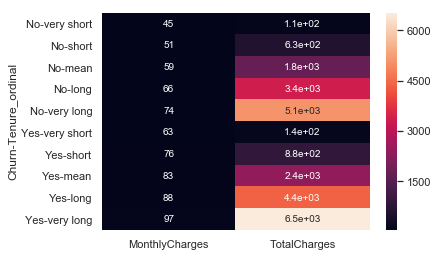

In [23]:
g = sns.heatmap(data_pivot, annot=True)

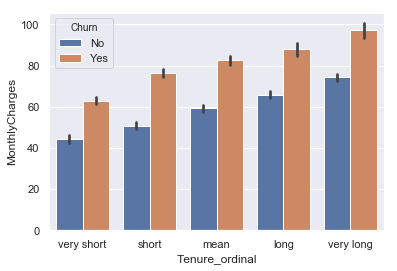

In [24]:
g = sns.barplot(x= "Tenure_ordinal" , y= "MonthlyCharges" , hue="Churn" , data=data)


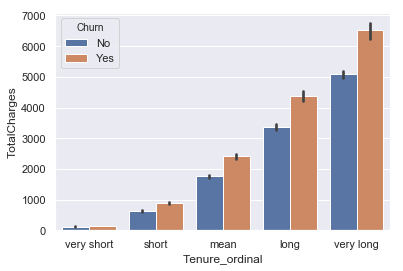

In [25]:
g = sns.barplot(x= "Tenure_ordinal" , y= "TotalCharges" , hue="Churn" , data=data)

In [26]:
pd.crosstab(index=[data["Churn"], data["Gender"]], columns=data["SeniorCitizen"])

SeniorCitizen     0    1
Churn Gender            
No    Female   2221  328
      Male     2287  338
Yes   Female    699  240
      Male      694  236

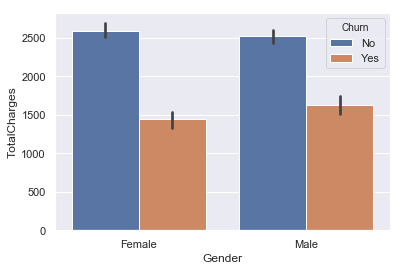

In [27]:
g = sns.barplot(x= "Gender", y= "TotalCharges" , hue="Churn" , data=data)

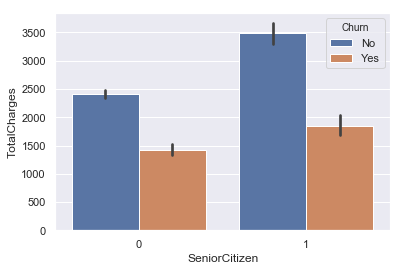

In [28]:
g = sns.barplot(x= "SeniorCitizen", y= "TotalCharges" , hue="Churn" , data=data)

In [29]:
pd.crosstab(index=data["PhoneService"], columns=data["InternetService"])

InternetService,DSL,Fiber optic,No
PhoneService,,,
No,682,0,0
Yes,1739,3096,1526


In [30]:
pd.crosstab(index=data["PhoneService"], columns=data["StreamingTV"])

StreamingTV,No,No internet service,Yes
PhoneService,,,
No,397,0,285
Yes,2413,1526,2422


In [31]:
pd.crosstab(index=data["PhoneService"], columns=data["StreamingMovies"])

StreamingMovies,No,No internet service,Yes
PhoneService,,,
No,384,0,298
Yes,2401,1526,2434


In [32]:
pd.crosstab(index=data["InternetService"], columns=data["StreamingTV"])

StreamingTV,No,No internet service,Yes
InternetService,,,
DSL,1464,0,957
Fiber optic,1346,0,1750
No,0,1526,0


In [33]:
pd.crosstab(index=data["InternetService"], columns=data["StreamingMovies"])

StreamingMovies,No,No internet service,Yes
InternetService,,,
DSL,1440,0,981
Fiber optic,1345,0,1751
No,0,1526,0


In [34]:
pd.crosstab(index=data["StreamingTV"], columns=data["StreamingMovies"])

StreamingMovies,No,No internet service,Yes
StreamingTV,,,
No,2018,0,792
No internet service,0,1526,0
Yes,767,0,1940


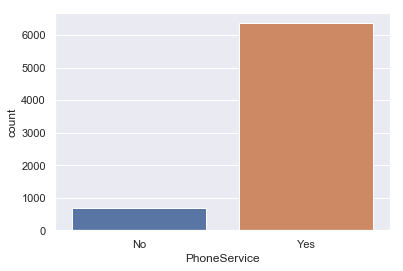

In [35]:
g = sns.countplot(x="PhoneService", data=data)

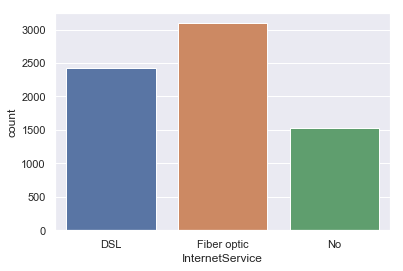

In [36]:
g = sns.countplot(x="InternetService", data=data)

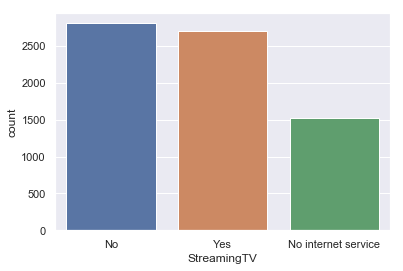

In [37]:
g = sns.countplot(x="StreamingTV", data=data)

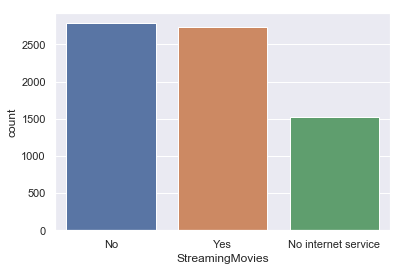

In [38]:
g = sns.countplot(x="StreamingMovies", data=data)

### Úloha 6 - Nahradenie chýbajúcich hodnôt (5b)

* Vhodným spôsobom nahraďte chýbajúce hondnoty v atribúte `MonthlyCharges` v závislosti od atribútu `TotalCharges` a `Tenure`.
* Pre hodnoty `TotalCharges` porozmýšľajte nad odvodením chýbajúcich hodnôt na základe `Tenure`.
* Vhodným spôsobom nahraďte chýbajúce hodnoty v atribúte `Dependents` v závislosti od atribútov `Gender` a `Partner`.

In [39]:
x = data.eval("TotalCharges / Tenure")
data["MonthlyCharges"].fillna(x, inplace=True) 
data["MonthlyCharges"].isna().sum()

0

In [40]:
x = data["MonthlyCharges"].min()
print(x)

18.25


In [41]:
x = data.eval("MonthlyCharges * Tenure")
data["TotalCharges"].fillna(x, inplace=True) 
data["TotalCharges"].isna().sum()

0

In [42]:
pd.crosstab(index=[data["Dependents"], data["Gender"]], columns=data["Partner"])

Partner              No  Yes
Dependents Gender           
No         Female  1646  804
           Male    1624  847
Yes        Female   144  880
           Male     214  864

In [43]:
#ked zena alebo muz nema partnera tak nema ani dependants
#ked maju tak maju tak na 50% maju dependants
#10 nemaju partnera, im treba pridat No pre dependants
#zvysnym 10 treba dat raz Yes a raz No

#x = "No" data.eval("TotalCharges / Tenure")
#data["MonthlyCharges"].fillna(x, inplace=True) 
#data["MonthlyCharges"].isna().sum()

naDependents = data.query("Dependents not in ['Yes','No']")
naDependents.head(30)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_ordinal,TotalCharges_ordinal,Tenure_ordinal
5,Female,0,No,NaN,8,Yes,Yes,Fiber optic,No,No,...,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,Yes,expensive,very small amount,short
27,Male,0,Yes,NaN,1,No,No phone service,DSL,No,Yes,...,No,Month-to-month,No,Electronic check,30.20,30.20,Yes,cheap,very small amount,very short
41,Female,0,Yes,NaN,70,Yes,Yes,DSL,Yes,Yes,...,No,Two year,Yes,Credit card (automatic),69.20,4872.35,No,normal,normal amount,very long
42,Female,0,Yes,NaN,17,Yes,No,No,No internet service,No internet service,...,No internet service,One year,No,Mailed check,20.75,418.25,No,very cheap,very small amount,short
44,Female,0,Yes,NaN,13,Yes,Yes,DSL,Yes,Yes,...,No,Month-to-month,Yes,Electronic check,76.20,981.45,No,expensive,very small amount,short
64,Female,0,No,NaN,9,Yes,Yes,Fiber optic,No,No,...,Yes,Month-to-month,No,Electronic check,94.40,857.25,Yes,expensive,very small amount,short
65,Female,0,No,NaN,3,Yes,No,DSL,No,Yes,...,Yes,Month-to-month,Yes,Electronic check,75.30,244.10,No,expensive,very small amount,very short
71,Female,0,Yes,NaN,52,Yes,No,No,No internet service,No internet service,...,No internet service,One year,Yes,Electronic check,20.40,1090.65,No,very cheap,very small amount,long
97,Male,0,No,NaN,5,Yes,No,No,No internet service,No internet service,...,No internet service,Month-to-month,No,Mailed check,21.05,113.85,Yes,very cheap,very small amount,very short
104,Male,0,Yes,NaN,68,Yes,Yes,Fiber optic,No,Yes,...,Yes,Two year,Yes,Bank transfer (automatic),110.00,7611.85,Yes,very expensive,very big amount,very long


In [44]:
data["Dependents"].fillna("No", inplace=True) 
data["Dependents"].isna().sum()

0

### Úloha 7 - Odvodenie nových atribútov (5b)

* Vytvorte nový atribút `TotalMonthCharges`, ktorého hondoty sú rovné `MonthlyCharges * Tenure`.
* Vytvorte nový atribút `TotalRatio` ktorý bude mať hodnotu -1 ak `TotalMonthCharges < TotalCharges`, 0 ak `TotalMonthCharges = TotalCharges` a +1 ak `TotalMonthCharges > TotalCharges`.

In [45]:
data["TotalMonthCharges"] = data["MonthlyCharges"] * data["Tenure"]

In [46]:
def map_TotalMonthCharges(TotalMonthCharges):
    if {"TotalMonthCharges < TotalCharges"}:
        return "-1"
    elif {"TotalMonthCharges == TotalCharges"}:
        return "0"
    elif {"TotalMonthCharges > TotalCharges"}:
        return "+1";
    

data["TotalRatio"] = data["TotalMonthCharges"].apply(map_TotalMonthCharges)
data["TotalRatio"].value_counts()

-1    7043
Name: TotalRatio, dtype: int64

In [47]:
data.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_ordinal,TotalCharges_ordinal,Tenure_ordinal,TotalMonthCharges,TotalRatio
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Yes,Electronic check,29.85,29.85,No,cheap,very small amount,very short,29.85,-1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,Mailed check,56.95,1889.50,No,normal,small amount,mean,1936.30,-1
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Yes,Mailed check,53.85,108.15,Yes,normal,very small amount,very short,107.70,-1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,Bank transfer (automatic),42.30,1840.75,No,cheap,small amount,long,1903.50,-1
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,Yes,Electronic check,70.70,151.65,Yes,normal,very small amount,very short,141.40,-1


### Úloha 8 - Prevedenie dát do podoby vhodnej pre modelovanie (5b)

Predspracovaný dátový rámec preveďte do podoby vhodnej pre modelovanie:
* Použite vhodný spôsob transformovania kategorických atribútov
* Použite normalizáciu zvolených atribútov pre modely, pre ktoré je normalizácia vhodná
* Zvoľte, ktoré z atribútov (pôvodných a vytvorených/transformovaných) použijete pri tvorbe modelov.

In [48]:
data.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'MonthlyCharges_ordinal',
       'TotalCharges_ordinal', 'Tenure_ordinal', 'TotalMonthCharges',
       'TotalRatio'],
      dtype='object')

In [49]:
data["Tenure_ordinal"].value_counts()

mean          1479
short         1436
very long     1407
very short    1371
long          1350
Name: Tenure_ordinal, dtype: int64

In [50]:
data.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_ordinal,TotalCharges_ordinal,Tenure_ordinal,TotalMonthCharges,TotalRatio
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Yes,Electronic check,29.85,29.85,No,cheap,very small amount,very short,29.85,-1
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,Mailed check,56.95,1889.50,No,normal,small amount,mean,1936.30,-1
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Yes,Mailed check,53.85,108.15,Yes,normal,very small amount,very short,107.70,-1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,Bank transfer (automatic),42.30,1840.75,No,cheap,small amount,long,1903.50,-1
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,Yes,Electronic check,70.70,151.65,Yes,normal,very small amount,very short,141.40,-1


In [51]:
from sklearn.preprocessing import LabelEncoder # najprv importujeme potrebné funkcie

data["Gender"] = LabelEncoder().fit_transform(data["Gender"])
data.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_ordinal,TotalCharges_ordinal,Tenure_ordinal,TotalMonthCharges,TotalRatio
0,0,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,Yes,Electronic check,29.85,29.85,No,cheap,very small amount,very short,29.85,-1
1,1,0,No,No,34,Yes,No,DSL,Yes,No,...,No,Mailed check,56.95,1889.50,No,normal,small amount,mean,1936.30,-1
2,1,0,No,No,2,Yes,No,DSL,Yes,Yes,...,Yes,Mailed check,53.85,108.15,Yes,normal,very small amount,very short,107.70,-1
3,1,0,No,No,45,No,No phone service,DSL,Yes,No,...,No,Bank transfer (automatic),42.30,1840.75,No,cheap,small amount,long,1903.50,-1
4,0,0,No,No,2,Yes,No,Fiber optic,No,No,...,Yes,Electronic check,70.70,151.65,Yes,normal,very small amount,very short,141.40,-1


In [52]:

data["Partner"] = data["Partner"].map({"No": 0, "Yes": 1})
data["Dependents"] = data["Dependents"].map({"No": 0, "Yes": 1})
data["PhoneService"] = data["PhoneService"].map({"No": 0, "Yes": 1})
data["MultipleLines"] = data["MultipleLines"].map({"No phone service": 0, "No": 1, "Yes": 2})
data["OnlineSecurity"] = data["OnlineSecurity"].map({"No internet service": 0, "No": 1, "Yes": 2})
data["OnlineBackup"] = data["OnlineBackup"].map({"No internet service": 0, "No": 1, "Yes": 2})
data["DeviceProtection"] = data["DeviceProtection"].map({"No internet service": 0, "No": 1, "Yes": 2})
data["TechSupport"] = data["TechSupport"].map({"No internet service": 0, "No": 1, "Yes": 2})
data["StreamingTV"] = data["StreamingTV"].map({"No internet service": 0, "No": 1, "Yes": 2})
data["StreamingMovies"] = data["StreamingMovies"].map({"No internet service": 0, "No": 1, "Yes": 2})
data["Contract"] = data["Contract"].map({"Month-to-month": 0, "One year": 1, "Two year": 2})
data["PaperlessBilling"] = data["PaperlessBilling"].map({"No": 0, "Yes": 1})
data["MonthlyCharges_ordinal"] = data["MonthlyCharges_ordinal"].map({"very cheap": 0, "cheap": 1, "normal":2, "expensive":3, "very expensive":4})
data["TotalCharges_ordinal"] = data["TotalCharges_ordinal"].map({"very small amount": 0, "small amount": 1, "normal amount":2, "big amount":3, "very big amount":4})
data["Tenure_ordinal"] = data["Tenure_ordinal"].map({"very short": 0, "short": 1, "mean":2, "long":3, "very long":4})
data["Churn"] = data["Churn"].map({"No": 0, "Yes": 1})
#data = pd.get_dummies(data, columns=["InternetService", "PaymentMethod"])

data.head()
#Zena = 0, Muz = 1

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MonthlyCharges_ordinal,TotalCharges_ordinal,Tenure_ordinal,TotalMonthCharges,TotalRatio
0,0,0,1,0,1,0,0,DSL,1,2,...,1,Electronic check,29.85,29.85,0,1.0,0.0,0,29.85,-1
1,1,0,0,0,34,1,1,DSL,2,1,...,0,Mailed check,56.95,1889.50,0,2.0,1.0,2,1936.30,-1
2,1,0,0,0,2,1,1,DSL,2,2,...,1,Mailed check,53.85,108.15,1,2.0,0.0,0,107.70,-1
3,1,0,0,0,45,0,0,DSL,2,1,...,0,Bank transfer (automatic),42.30,1840.75,0,1.0,1.0,3,1903.50,-1
4,0,0,0,0,2,1,1,Fiber optic,1,1,...,1,Electronic check,70.70,151.65,1,2.0,0.0,0,141.40,-1


In [53]:
data = pd.get_dummies(data, columns=["InternetService", "PaymentMethod"])
data.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Tenure_ordinal,TotalMonthCharges,TotalRatio,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,2,1,...,0,29.85,-1,1,0,0,0,0,1,0
1,1,0,0,0,34,1,1,2,1,2,...,2,1936.30,-1,1,0,0,0,0,0,1
2,1,0,0,0,2,1,1,2,2,1,...,0,107.70,-1,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,2,1,2,...,3,1903.50,-1,1,0,0,1,0,0,0
4,0,0,0,0,2,1,1,1,1,1,...,0,141.40,-1,0,1,0,0,0,1,0


In [57]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler() 
data = pd.DataFrame(scaler.fit_transform(data), index=data.index, columns=data.columns)
data.head()

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype uint8, int32, int64, float64, object were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Tenure_ordinal,TotalMonthCharges,TotalRatio,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.0,1.0,0.0,0.013889,0.0,0.0,0.5,1.0,0.5,...,0.00,0.003491,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.472222,1.0,0.5,1.0,0.5,1.0,...,0.50,0.226468,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.027778,1.0,0.5,1.0,1.0,0.5,...,0.00,0.012596,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.625000,0.0,0.0,1.0,0.5,1.0,...,0.75,0.222632,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.027778,1.0,0.5,0.5,0.5,0.5,...,0.00,0.016538,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [62]:
data.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MonthlyCharges_ordinal', 'TotalCharges_ordinal',
       'Tenure_ordinal', 'TotalMonthCharges', 'TotalRatio',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

### Úloha 9 - Rozdelenie dát na trénovanie a testovanie (2b)

* Rozdeľte dátovú množinu do matice príznakov a vektora hodnôt cieľového atribútu
* Rozdeľte dáta do trénovacej a testovacej množiny v pomere 70/30.

In [63]:
X_data = data.drop(columns=["Churn", "TotalRatio", "MonthlyCharges_ordinal", "TotalCharges_ordinal",
       "Tenure_ordinal"], axis=1) # vytvoríme maticu príznakov - použijeme všetky stĺpce okrem cieľového atribútu a uložíme do X_titanic
y_data = data["Churn"] # vytvoríme vektor hodnôt cieľového atribútu ako stĺpec 'survived'

print(X_data.shape) # pre kontrolu môžeme vypísať rozmery matice hodnôt a vektora cieľového atribútu
print(y_data.shape)

(7043, 25)
(7043,)


In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=1)

### Úloha 10 - Natrénovanie klasifikačných modelov a nájdenie optimálnych parametrov (6b)

Natrénujte klasifikačné modely rôznych typov (Stromy, kNN, Naive Bayes, Random Forests). Pre nájdenie optimálnych parametrov modelov jednotlivých typov modelov použite GridSearch. V rámci GridSearch modely validujte 5- násobnou krížovou validáciou a ako metriku pre ich vyhodnotenie použite `accuracy`.

In [65]:
from sklearn.neighbors import KNeighborsClassifier # Importovanie triedy zodpovedajúcej modelu, ktorý budeme trénovať


model = KNeighborsClassifier()                    # Natrénovanie modelu kNN  
model.fit(X_train, y_train)                          # Trénovanie modelu na trénovacej množine 
y_model = model.predict(X_test)   

from sklearn.metrics import accuracy_score,precision_score, recall_score

print(f"Presnosť (accuracy) modelu: {accuracy_score(y_test, y_model)}")
print(f"Presnosť (precision) modelu: {precision_score(y_test, y_model)}")
print(f"Návratnosť (recall) modelu: {recall_score(y_test, y_model)}")

Presnosť (accuracy) modelu: 0.7756743965925225
Presnosť (precision) modelu: 0.5487364620938628
Návratnosť (recall) modelu: 0.5757575757575758


In [66]:
from sklearn.model_selection import GridSearchCV # importujeme potrebné knižnice

# definujeme hodnoty parametrov, ktoré sa budú prehľadávať
# pre parameter k vygenerujeme rozsah 1 až 50

k_range = list(range(1, 50))
print(k_range)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [67]:
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]}


In [68]:
grid = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv=5, scoring='accuracy') # nastavíme parametre Grid Searchu
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [69]:
print("Najlepšie parametre sú:")
print()
print(grid.best_params_)
print()
print(grid.best_score_)

Najlepšie parametre sú:

{'n_neighbors': 35}

0.7835699797160244


### Úloha 11 - Porovnanie modelov pomocou ROC kriviek (4b)

* Modely otestujte na testovacej množine a modely jednotlivých typov s najvhodnejšími parametrami vzájomne porovnajte pomocou ROC kriviek a AUC koeficientov. ROC krivky vykreslite pomocou matplotlib a nájdite najlepší z modelov.  

In [70]:
BestModel = KNeighborsClassifier(35)                    # Natrénovanie modelu kNN  
BestModel.fit(X_train, y_train)                          # Trénovanie modelu na trénovacej množine 
y_BestModel = model.predict(X_test)   

from sklearn.metrics import accuracy_score,precision_score, recall_score

print(f"Presnosť (accuracy) BestModelu: {accuracy_score(y_test, y_BestModel)}")
#print(f"Presnosť (precision) BestModelu: {precision_score(y_test, y_BestModel)}")
#(f"Návratnosť (recall) BestModelu: {recall_score(y_test, y_BestModel)}")

Presnosť (accuracy) BestModelu: 0.7756743965925225


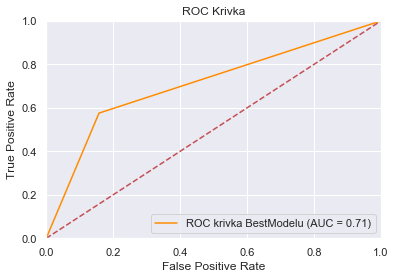

In [71]:
from sklearn.metrics import roc_curve,auc
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_BestModel, pos_label=1) 

# rovnako spocitame AUC koeficient pre model2
roc_auc2 = auc(fpr2, tpr2) 

# vsetky vystupy sme ulozili do premennych identifikovanych cislom 2 - to preto, aby sme neprepisali hodnoty, v ktorych su ulozene koeficienty povodneho modelu

# pomocou matplotlib vykreslíme ROC krivku
plt.title('ROC Krivka') # definujeme názov obrázku
#plt.plot(fpr, tpr, 'navy', label = 'ROC krivka modelu (AUC = %0.2f)' % roc_auc) # vykreslíme ROC krivku, navy farbou, vypíšeme do legendy AUC koeficient
plt.plot(fpr2, tpr2, 'darkorange', label = 'ROC krivka BestModelu (AUC = %0.2f)' % roc_auc2) # vykreslíme ROC krivku, navy farbou, vypíšeme do legendy AUC koeficient
plt.legend(loc = 'lower right') # nastavíme vykreslenie legendy vpravo dole
plt.plot([0, 1], [0, 1],'r--') # vykreslíme červenou (r) prerušovanou farbou diagonálu
plt.xlim([0, 1]) # os x bude nadobúdať hodnoty od 0 do 1
plt.ylim([0, 1]) # os y bude nadobúdať hodnoty od 0 do 1
plt.ylabel('True Positive Rate') # jednotlivé osi otitulkujeme
plt.xlabel('False Positive Rate') # jednotlivé osi otitulkujeme
plt.show() # zobrazíme obrázok

### Úloha 12 - Vyhodnotenie modelu na testovacej množine (4b)

* Modely otestujte na testovacej množine, pri testovaní na testovacej množine vypíšte hodnoty metrík (accuracy, precision, recall) a confusion matrix. Porovnajte výsledky - ktorý z modelov najlepšie predikuje deteguje zákazníkov, ktorí od telekomunikačného operátora odídu?
* Vykreslite model rozhodovacích stromov (pomocou webgraphviz). Pokúste sa zo štruktúry modelu odvodiť klasifikačné pravidlo/pravidlá pre identifikáciu odchádzajúcich zákazníkov.

In [72]:
BestModel = KNeighborsClassifier(15)                    # Natrénovanie modelu kNN  
BestModel.fit(X_train, y_train)                          # Trénovanie modelu na trénovacej množine 
y_BestModel = model.predict(X_test)   

from sklearn.metrics import accuracy_score,precision_score, recall_score

print(f"Presnosť (accuracy) BestModelu: {accuracy_score(y_test, y_BestModel)}")
print(f"Presnosť (precision) BestModelu: {precision_score(y_test, y_BestModel)}")
print(f"Návratnosť (recall) BestModelu: {recall_score(y_test, y_BestModel)}")

Presnosť (accuracy) BestModelu: 0.7756743965925225
Presnosť (precision) BestModelu: 0.5487364620938628
Návratnosť (recall) BestModelu: 0.5757575757575758


In [73]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_BestModel)
print(cm)

[[1335  250]
 [ 224  304]]


In [74]:
from sklearn.preprocessing import LabelEncoder
#Ake data potrebujeme na stromy? - numericke, nie normovane, nie duplikatne (cize nie ordinalne)
data_dt = pd.read_csv("../data/Telecom-Churn.csv")
data_dt = data_dt.drop(columns=["Unnamed: 0", "CustomerID"])

x = data_dt.eval("TotalCharges / Tenure")
data_dt["MonthlyCharges"].fillna(x, inplace=True) 
data_dt["MonthlyCharges"].isna().sum()

y = data_dt.eval("MonthlyCharges * Tenure")
data_dt["TotalCharges"].fillna(y, inplace=True) 
data_dt["TotalCharges"].isna().sum()

data_dt["Dependents"].fillna("No", inplace=True)

data_dt["Gender"] = LabelEncoder().fit_transform(data_dt["Gender"])
data_dt["Partner"] = data_dt["Partner"].map({"No": 0, "Yes": 1})
data_dt["Dependents"] = data_dt["Dependents"].map({"No": 0, "Yes": 1})
data_dt["PhoneService"] = data_dt["PhoneService"].map({"No": 0, "Yes": 1})
data_dt["MultipleLines"] = data_dt["MultipleLines"].map({"No phone service": 0, "No": 1, "Yes": 2})
data_dt["OnlineSecurity"] = data_dt["OnlineSecurity"].map({"No internet service": 0, "No": 1, "Yes": 2})
data_dt["OnlineBackup"] = data_dt["OnlineBackup"].map({"No internet service": 0, "No": 1, "Yes": 2})
data_dt["DeviceProtection"] = data_dt["DeviceProtection"].map({"No internet service": 0, "No": 1, "Yes": 2})
data_dt["TechSupport"] = data_dt["TechSupport"].map({"No internet service": 0, "No": 1, "Yes": 2})
data_dt["StreamingTV"] = data_dt["StreamingTV"].map({"No internet service": 0, "No": 1, "Yes": 2})
data_dt["StreamingMovies"] = data_dt["StreamingMovies"].map({"No internet service": 0, "No": 1, "Yes": 2})
data_dt["Contract"] = data_dt["Contract"].map({"Month-to-month": 0, "One year": 1, "Two year": 2})
data_dt["PaperlessBilling"] = data_dt["PaperlessBilling"].map({"No": 0, "Yes": 1})
data_dt["Churn"] = data_dt["Churn"].map({"No": 0, "Yes": 1})
data_dt = pd.get_dummies(data_dt, columns=["InternetService", "PaymentMethod"])
data_dt.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,1,2,1,...,29.85,29.85,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,1,2,1,2,...,56.95,1889.50,0,1,0,0,0,0,0,1
2,1,0,0,0,2,1,1,2,2,1,...,53.85,108.15,1,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,2,1,2,...,42.30,1840.75,0,1,0,0,1,0,0,0
4,0,0,0,0,2,1,1,1,1,1,...,70.70,151.65,1,0,1,0,0,0,1,0


In [87]:
X_data_dt = data_dt.drop(columns=["Churn", "TotalCharges"], axis=1) # vytvoríme maticu príznakov - použijeme všetky stĺpce okrem cieľového atribútu a uložíme do X_titanic
y_data_dt = data_dt["Churn"] # vytvoríme vektor hodnôt cieľového atribútu ako stĺpec 'survived'

print(X_data_dt.shape) # pre kontrolu môžeme vypísať rozmery matice hodnôt a vektora cieľového atribútu
print(y_data_dt.shape)

(7043, 23)
(7043,)


In [88]:
from sklearn.model_selection import train_test_split
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_data_dt, y_data_dt, test_size=0.3, random_state=1)

In [89]:
from sklearn.tree import DecisionTreeClassifier # Importovanie triedy zodpovedajúcej modelu, ktorý budeme trénovať
from sklearn.metrics import confusion_matrix

dt = DecisionTreeClassifier(max_depth=3)   # Inicializácia stromového modelu   
dt.fit(X_train_dt, y_train_dt)        # Trénovanie modelu na trénovacej množine 
y_dt = dt.predict(X_test_dt)       # Otestovanie modelu na testovacej množine

from sklearn.metrics import accuracy_score,precision_score, recall_score # vypočítanie metrík kvality modelu

print(f"Presnosť (accuracy) modelu: {accuracy_score(y_test_dt, y_dt)}")
print(f"Presnosť (precision) modelu: {precision_score(y_test_dt, y_dt)}")
print(f"Návratnosť (recall) modelu: {recall_score(y_test_dt, y_dt)}")

cm = confusion_matrix(y_test_dt, y_dt)  # vypísanie kontigenčnej tabuľky
print(cm)

Presnosť (accuracy) modelu: 0.8021769995267393
Presnosť (precision) modelu: 0.6883561643835616
Návratnosť (recall) modelu: 0.3806818181818182
[[1494   91]
 [ 327  201]]


In [90]:
from sklearn import tree
from sklearn.tree import export_graphviz

with open("decision_tree.txt", "w") as f:
    f = tree.export_graphviz(dt, feature_names=X_data_dt.columns.values, class_names=['0','1'], out_file=f)

In [63]:
# Ked zakaznik ma contract month-to-month a ma internet a je kratsie ako 14,5 mesiaca tak je sklon zakaznika odist
